## STUDENT PERFORMANCE PREDICTION

### Import Libraries

### import pandas as pd
####  Loads Pandas to work with data tables (DataFrames).

### import numpy as np
 #### Loads NumPy for working with arrays and mathematical operations.

### import matplotlib.pyplot as plt
 #### Loads Matplotlib for creating plots and charts (e.g., bar, line, etc.).

### import seaborn as sns
 #### Loads Seaborn for making beautiful and informative statistical plots.

### from sklearn.model_selection import train_test_split  Used to split the dataset into training and testing parts.

### from sklearn.preprocessing import LabelEncoder
 #### Converts text labels into numbers (e.g., "Yes", "No" → 1, 0).

### from sklearn.ensemble import RandomForestClassifier
 #### Loads the Random Forest model, which is used for classification tasks.

### from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 #### Loads tools to evaluate the model's performance:

### accuracy_score: percent of correct predictions

### confusion_matrix: table showing actual vs predicted

### classification_report: shows precision, recall, F1-score



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### load dataset

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')

#### Shows the first 5 rows of the DataFrame (df).


In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Gives summary statistics of the numeric columns in the DataFrame.


In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Shows the last 5 rows of the DataFrame (df)

In [5]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


#### Shows a summary of the DataFrame, including:

#### Number of rows and columns

#### Column names

#### Data types (e.g., int, float, object)

#### Non-null counts (how many values are not missing)



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### Checks for missing (null) values in the DataFrame

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Step 3: Preprocessing
 #### Create Target Column (Pass/Fail)
Creates a new column in the DataFrame called 'pass'.

Uses the values in column 'G3' (usually final exam scores).

If the score is 10 or more, marks it as 1 (pass), otherwise 0 (fail).

 

In [8]:
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)


#### Drop unnecessary columns

In [9]:
df = df.drop(['G1', 'G2', 'G3'], axis=1)

#### Encode Categorical Columns

In [10]:
label_enc = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_enc.fit_transform(df[col])

### Step 4: Model Training
🔹 4.1 Split into train and test sets

In [11]:
X = df.drop('pass', axis=1)  
y = df['pass']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4.2 Train the Model

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Step 5: Accuracy Evaluation

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7215189873417721

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.30      0.42        27
           1       0.72      0.94      0.82        52

    accuracy                           0.72        79
   macro avg       0.72      0.62      0.62        79
weighted avg       0.72      0.72      0.68        79



### Step 6: Confusion Matrix

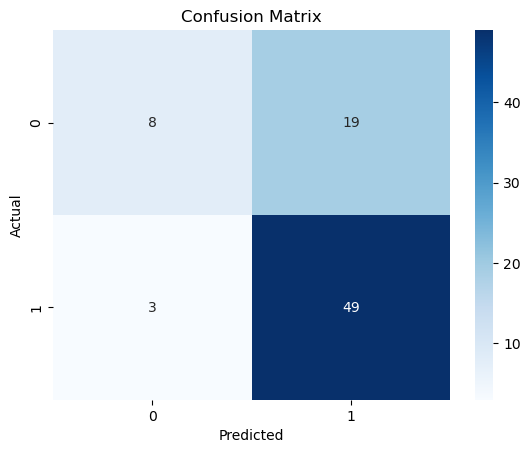

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### User Input Prediction

In [15]:
print("\n--- Enter your details to predict pass/fail ---")
input_data = {
    'age': int(input("Age: ")),
    'traveltime': int(input("Travel time (1-4): ")),
    'studytime': int(input("Study time (1-4): ")),
    'failures': int(input("Number of past class failures: ")),
    'freetime': int(input("Free time after school (1-5): ")),
    'goout': int(input("Going out with friends (1-5): ")),
    'health': int(input("Health status (1-5): ")),
    'absences': int(input("Number of absences: "))
}

sample = X.mean().to_dict()
sample.update(input_data)

input_df = pd.DataFrame([sample])
prediction = model.predict(input_df)[0]
print("\nPrediction: ", "PASS" if prediction == 1 else "FAIL")



--- Enter your details to predict pass/fail ---


Age:  22
Travel time (1-4):  2
Study time (1-4):  2
Number of past class failures:  0
Free time after school (1-5):  2
Going out with friends (1-5):  2
Health status (1-5):  3
Number of absences:  5



Prediction:  PASS
